In [1]:
import numpy as np
import scanpy as sc
import pandas as pd

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()  # print version
sc.settings.set_figure_params(dpi=80, facecolor='white')  # Set resolution/size, styling and

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.10 pynndescent==0.5.4


In [3]:
adult_wc_path = '../results/adult_wc_T.csv'
adult_wc = sc.read_csv(adult_wc_path)
# adult_wc.write_csvs('../results/adult_wc/')

normalizing counts per cell
    finished (0:00:00)


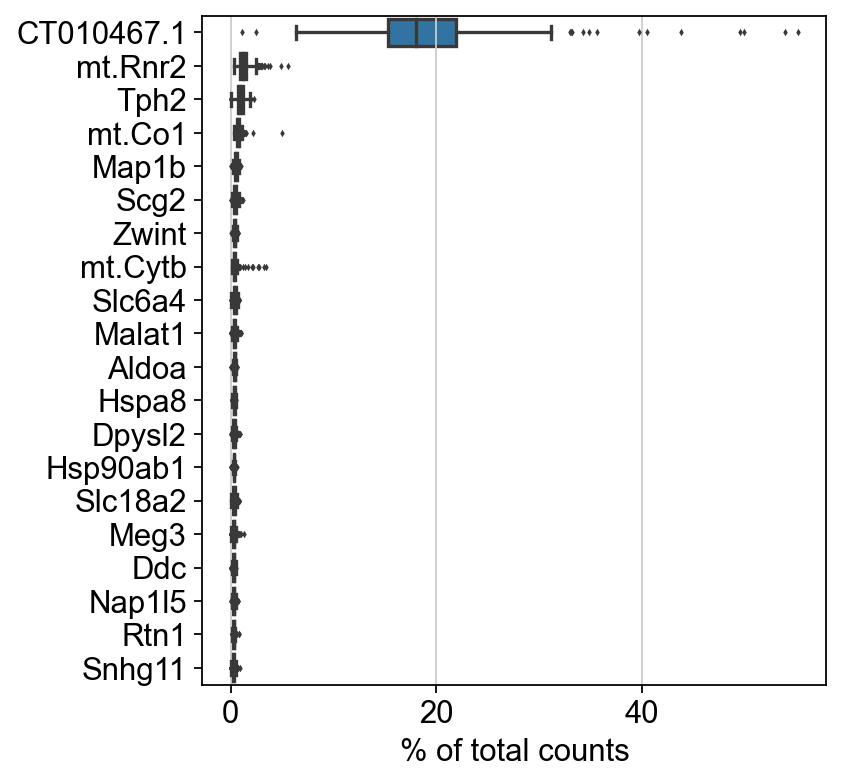

In [4]:
sc.pl.highest_expr_genes(adult_wc, n_top=20)

filtered out 1 genes that are detected in more than 100000000 counts
normalizing counts per cell
    finished (0:00:00)


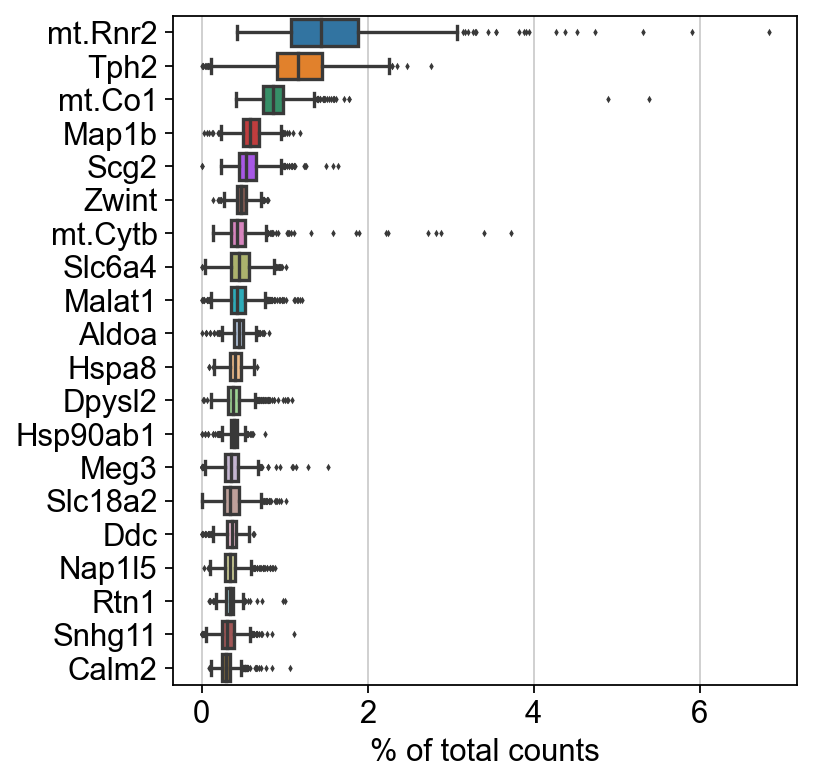

In [5]:
sc.pp.filter_genes(adult_wc, max_counts = 100000000, inplace=True)
sc.pl.highest_expr_genes(adult_wc, n_top=20)

In [6]:
adult_wc.var['mt'] = adult_wc.var_names.str.startswith('mt.')  # 将线粒体基因标记为 mt
sc.pp.calculate_qc_metrics(adult_wc,qc_vars=['mt'],percent_top=None, log1p=False, inplace=True)
# adult_wc.write_csvs('../results/qc_metrics/')

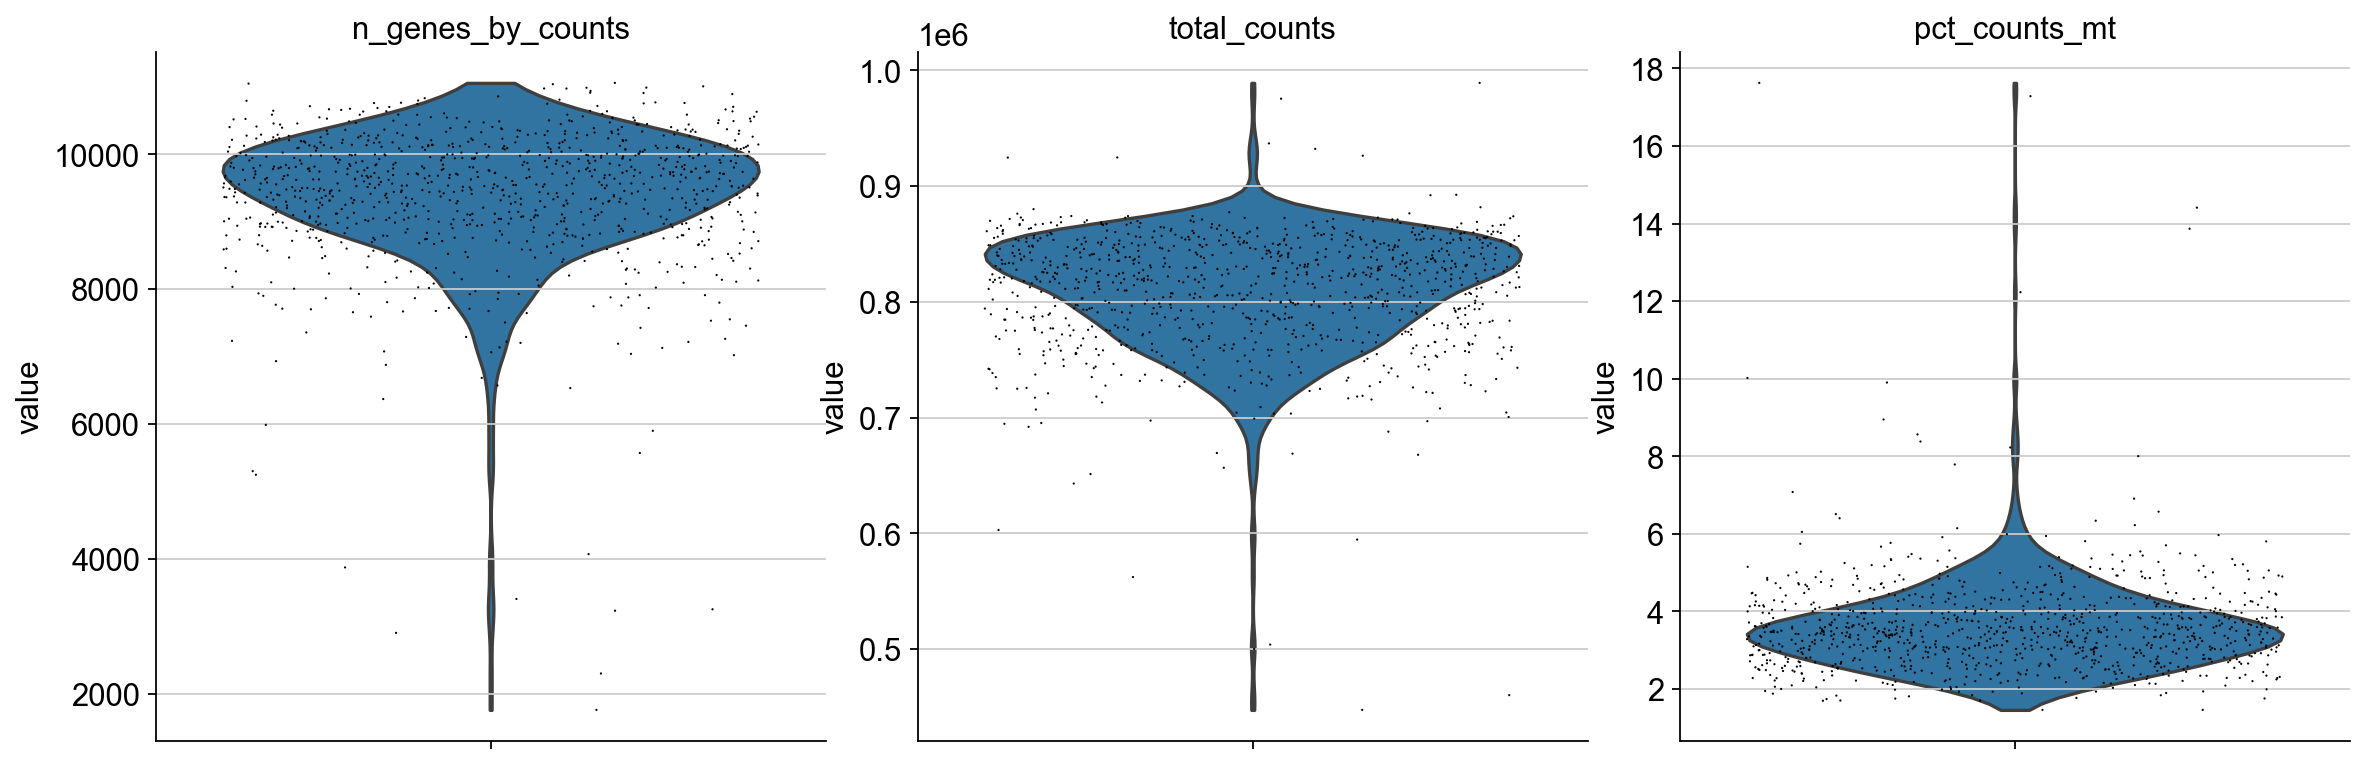

In [7]:
sc.pl.violin(adult_wc, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

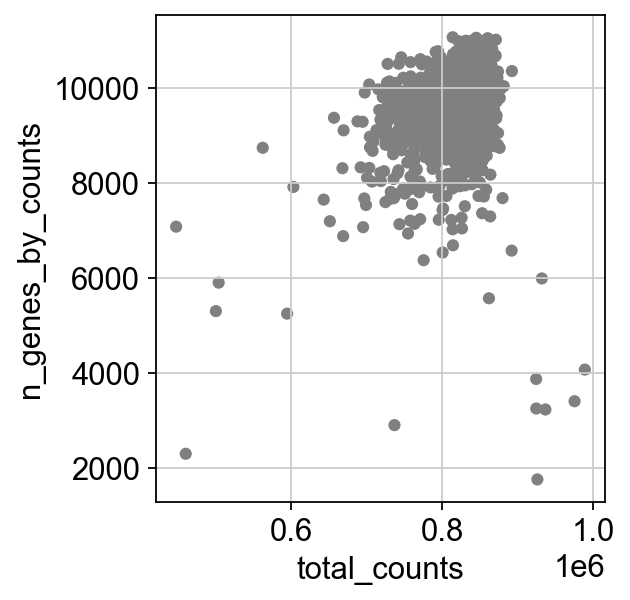

In [8]:
sc.pl.scatter(adult_wc, x='total_counts', y='n_genes_by_counts')

In [9]:
sc.pp.normalize_total(adult_wc, target_sum=1e4)
sc.pp.log1p(adult_wc)
# sc.pp.scale(adult_wc)
# pd.DataFrame(adult_wc.X).to_csv('../results/normalize/X.csv',header=adult_wc.var_names)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


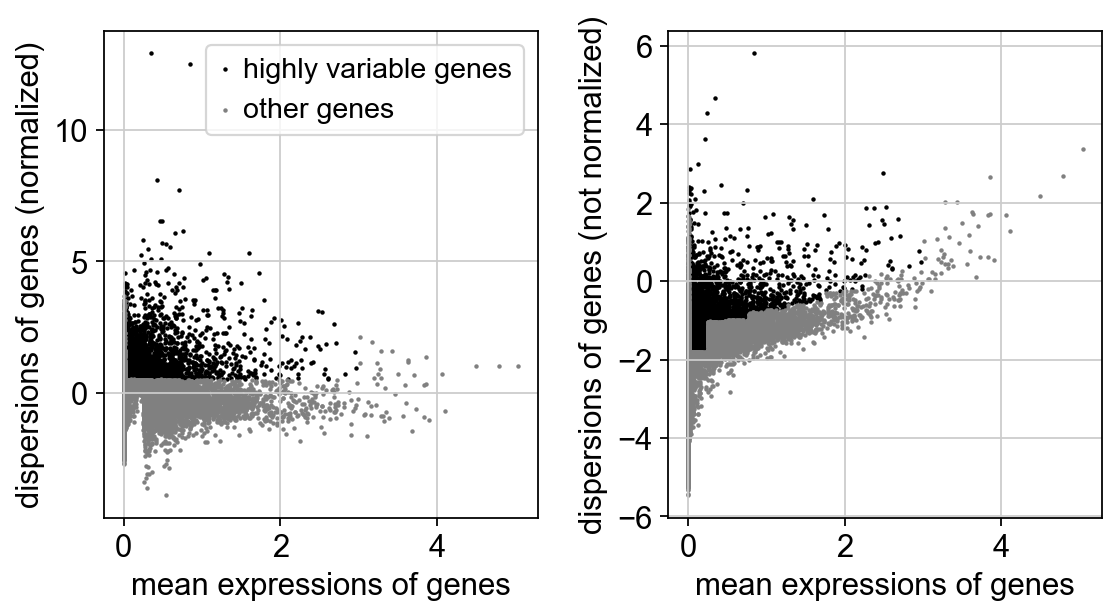

In [10]:
sc.pp.highly_variable_genes(adult_wc)
sc.pl.highly_variable_genes(adult_wc)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


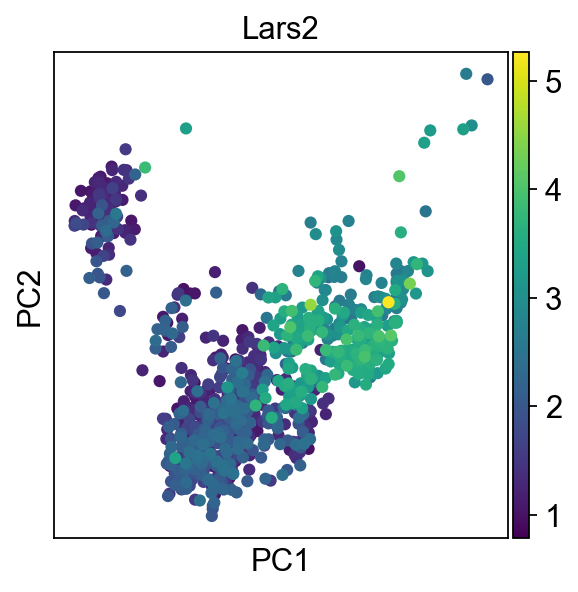

In [23]:
sc.tl.pca(adult_wc, svd_solver='arpack')
sc.pl.pca(adult_wc, color='Lars2')
# adult_wc.write_csvs('../results/pca/')

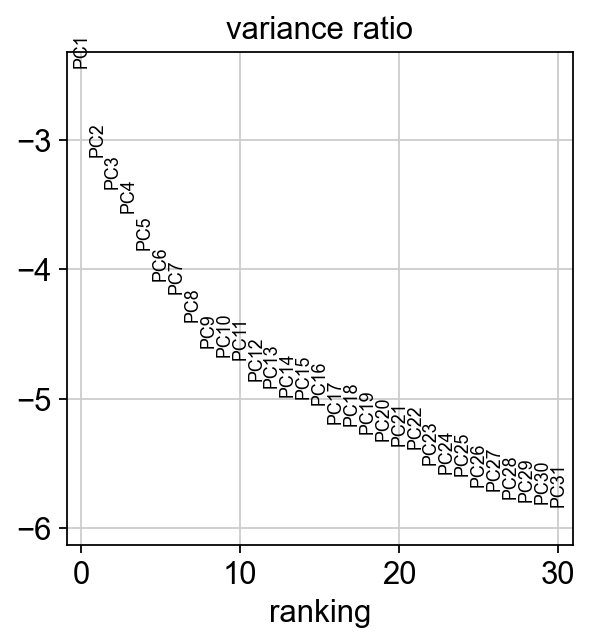

In [12]:
sc.pl.pca_variance_ratio(adult_wc, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


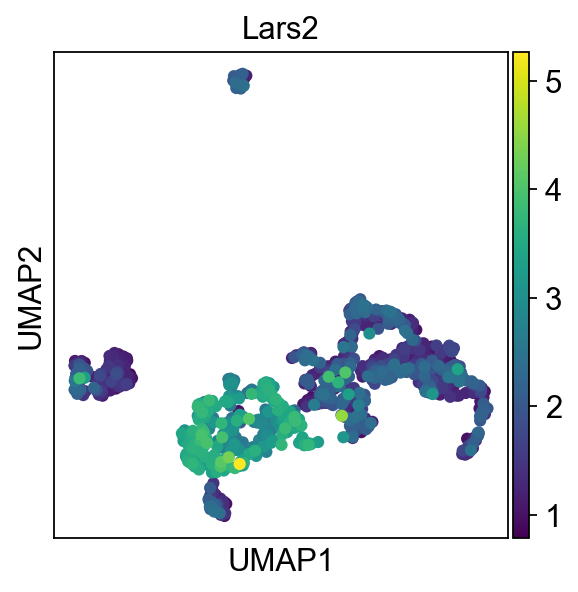

In [24]:
sc.pp.neighbors(adult_wc, n_neighbors=10, n_pcs=40)
sc.tl.umap(adult_wc)
sc.pl.umap(adult_wc,color='Lars2')

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE


D:\anaconda\envs\scanpy0\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:03)


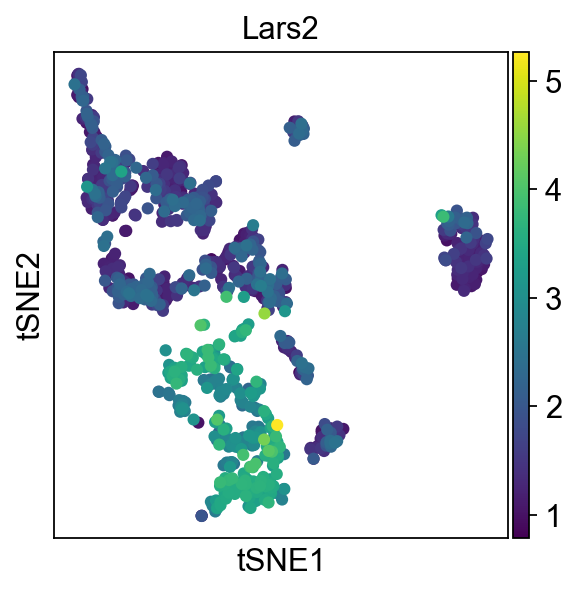

In [25]:
sc.pp.neighbors(adult_wc, n_neighbors=10, n_pcs=40)
sc.tl.tsne(adult_wc)
sc.pl.tsne(adult_wc,color='Lars2')

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


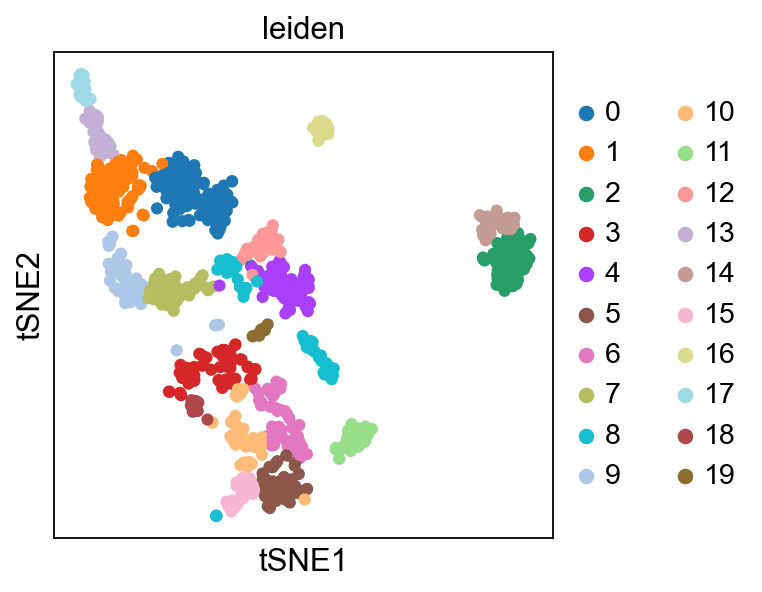

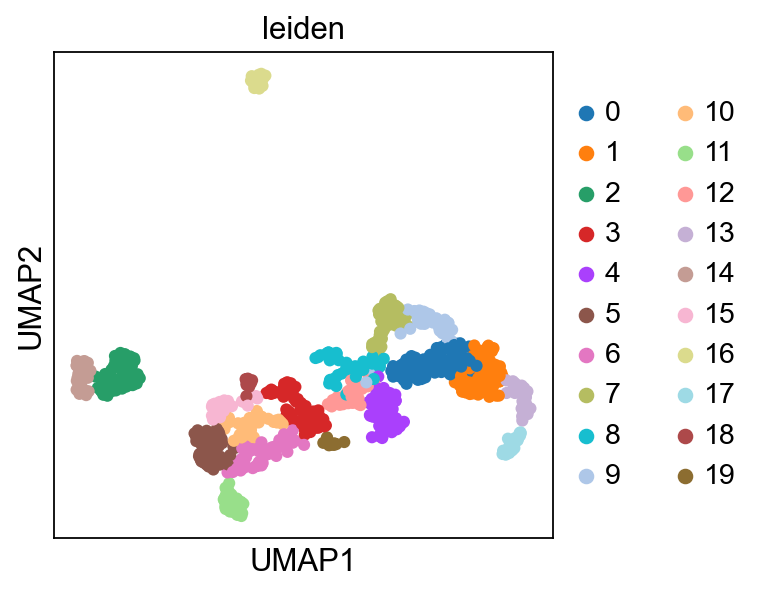

In [20]:
sc.pp.neighbors(adult_wc, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adult_wc)
# adult_wc.write_csvs('../results/leiden/')
sc.pl.umap(adult_wc,color=['leiden'])
sc.pl.tsne(adult_wc, color=['leiden'])

In [21]:
sc.tl.louvain(adult_wc)
sc.pl.tsne(adult_wc, color=['louvain'])
sc.pl.umap(adult_wc,color=['louvain'])

running Louvain clustering


ModuleNotFoundError: No module named 'louvain'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:00:14)


D:\anaconda\envs\scanpy0\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


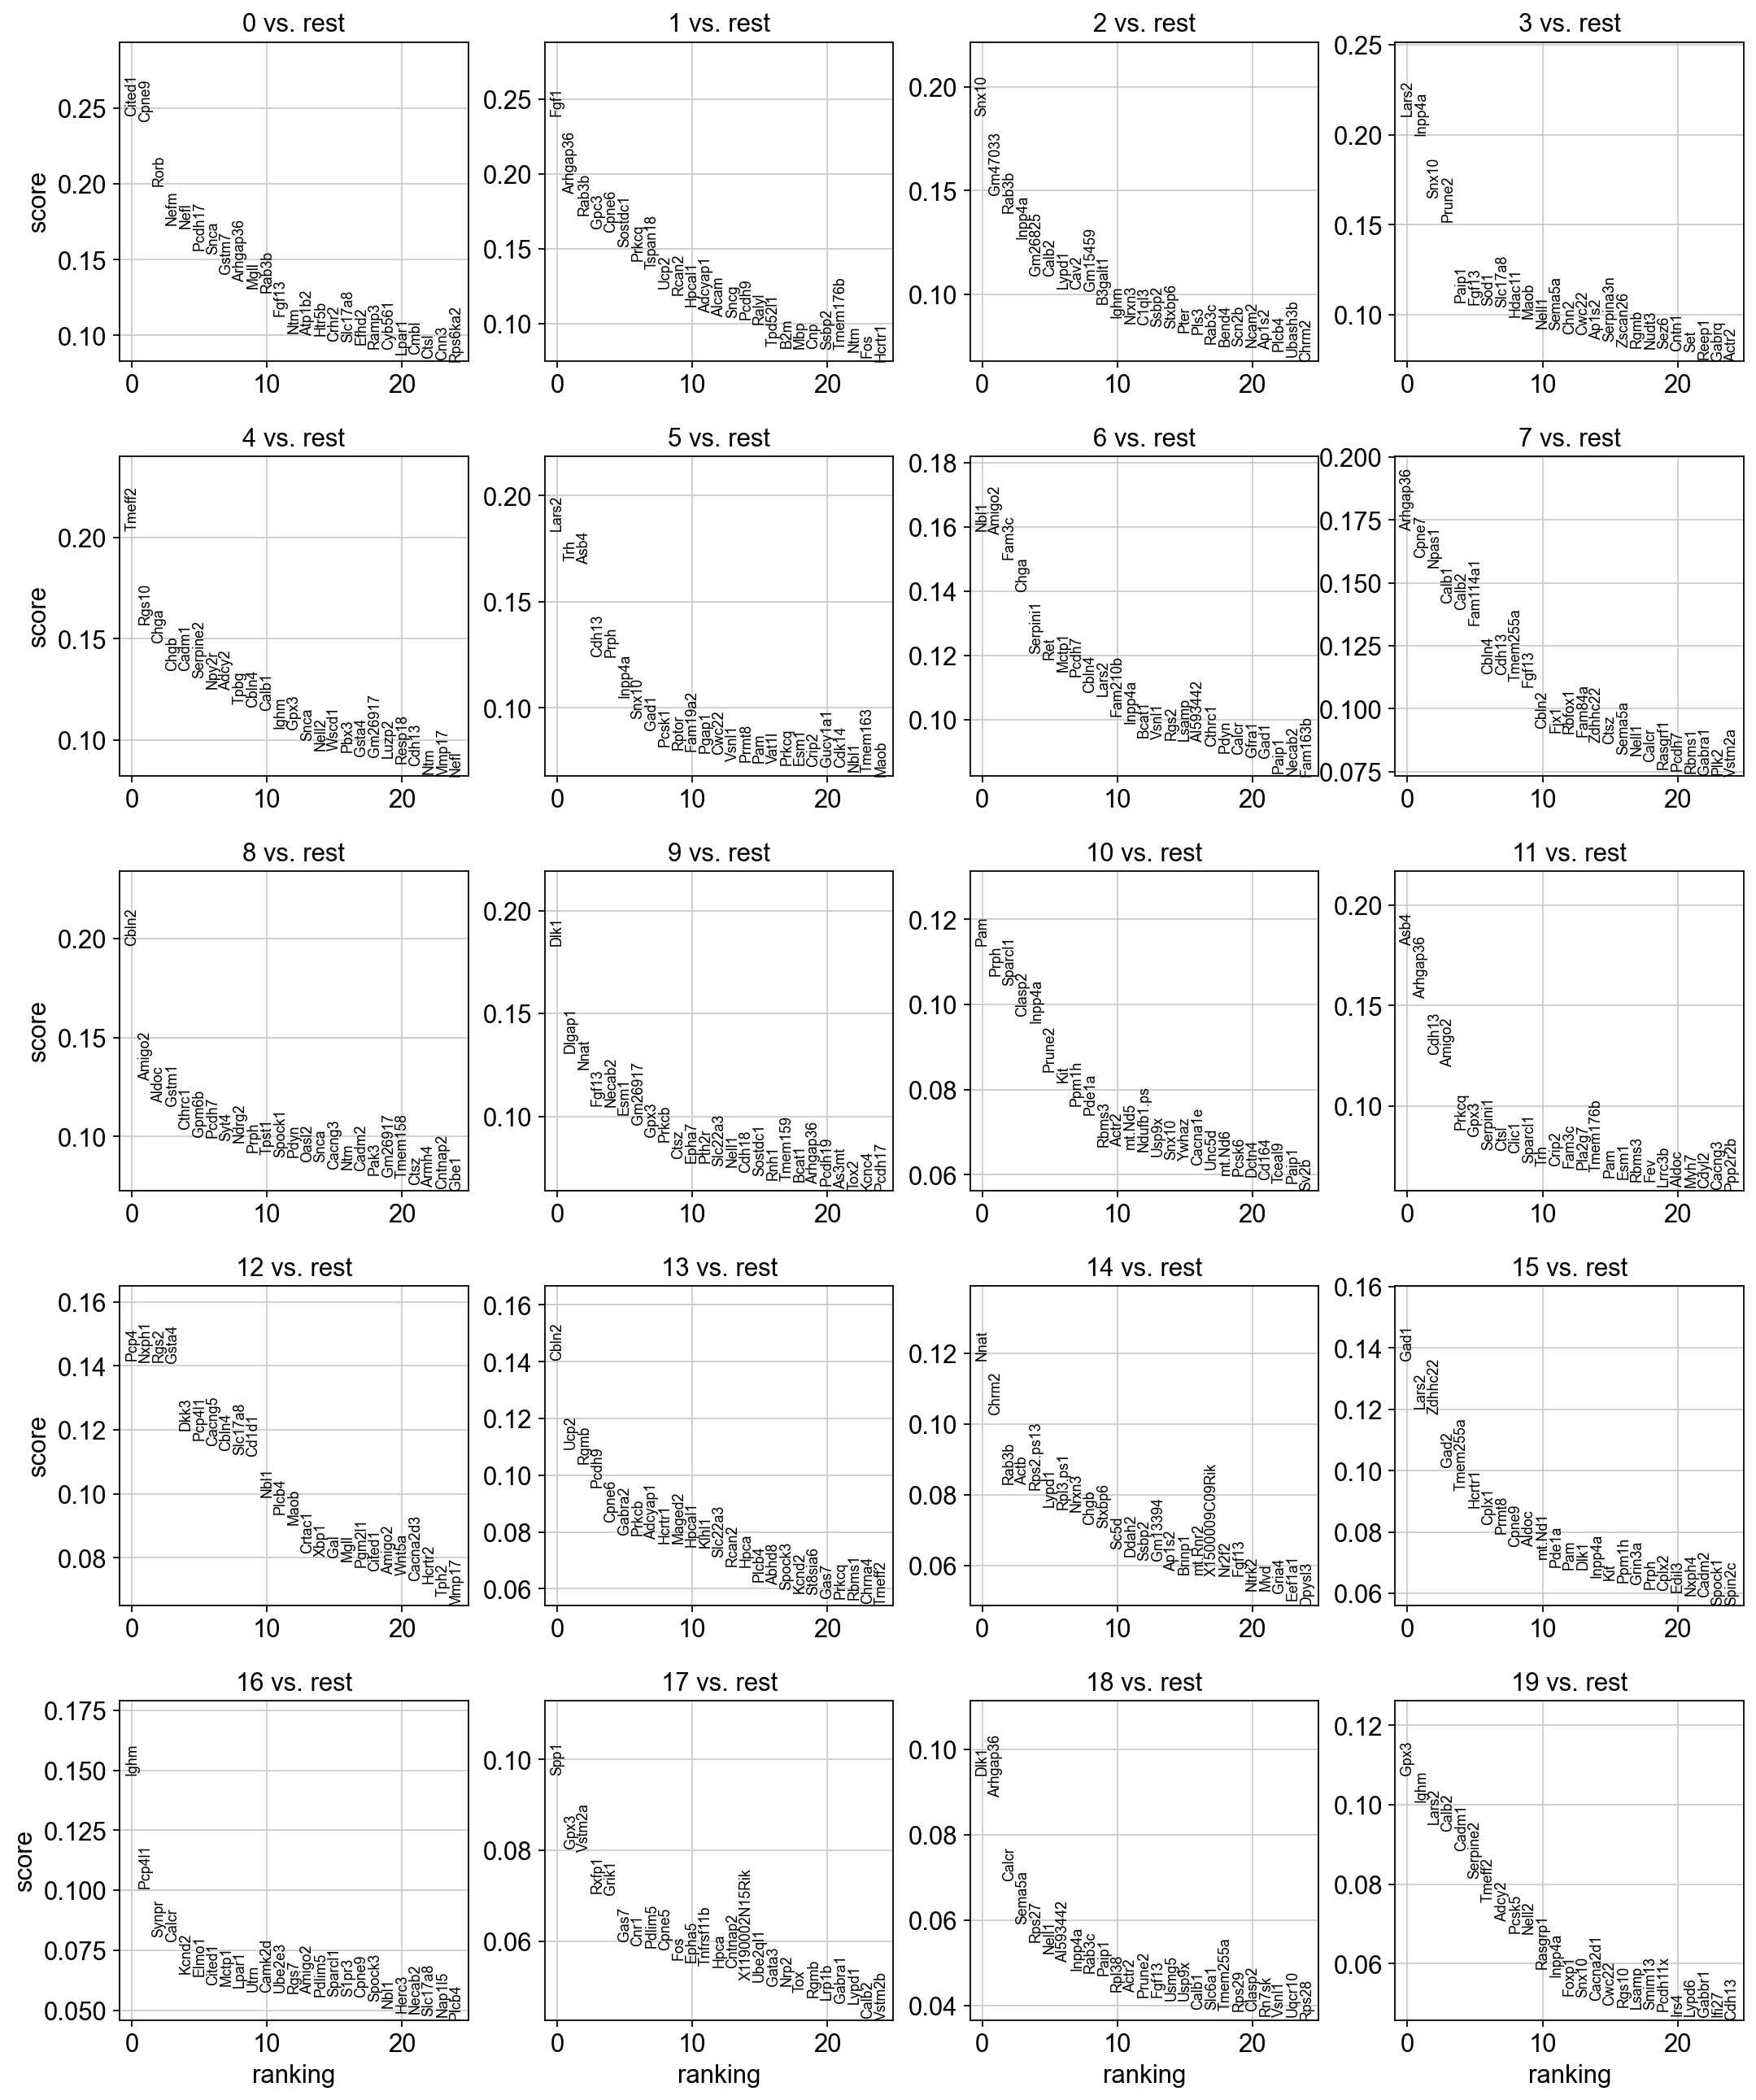

In [22]:
sc.tl.rank_genes_groups(adult_wc, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adult_wc, n_genes=25, sharey=False)